# Genomic Sequencing - Week 1

**Newspaper Problem**<br>
Imagine you had a bunch of pieces of a newspaper, could you reconstruct the entire paper from all the tiny snippets?<br>
What if there were pieces from multiple copies of a paper, you could not reconstruct just like a puzzle. A better method would be to use overlapping fragments to re-construct.<br><br>
How does this relate to biology?<br>
Sequencing nucleotides from an organism does not occur like reading a book (beginning to end). Instead the best technique available is to sequence short DNA fragments called **reads**.

Traditional Method for DNA Sequencing:
* Take small tissue or blood sample containing millions of cells with identical DNA and use a biochemical method to break the DNA into fragments. Sequence these fragments to produce many reads.

The problem with this is you do not know where in the genome each read comes from. Putting the genome back together from the reads is called **genome assembly**

<img src="img/sequencing_overview.png" width="500">

Difficulties of Genome Assembly:
1. You do not know which strand of the DNA a read derives from. Think about...Should you be using a read or the reverse compliment?
2. Modern sequencing machines are not perfect and generate errors. This makes identifying all overlapping reads very difficult/impossible.
3. Some regions of the genome might not be covered by reads or have a shallow read depth. Making a full reconstruction impossible.

For our initial algorithms assume all reads are the same length k-mer for some value k. We will also assume, unrealistically, that all reads come from the same strand, have no error, and exhibit perfect coverage.

First, a function that will generate all k-mers of a sequence

In [6]:
def strComp(Text, k):
    '''
    String Composition
    Given a string Text, generate its k-mer composition.
    
    Args:
        Text (string): String to break into k-mer composition.
        k (int): Length of k-mer to break Text into.
        
    Returns:
        list[string]: Coposition collection of all k-mers of Text.
    '''
    kmers = []
    for i in range(len(Text) - k + 1):
        kmers.append(Text[i:i+k])
    return kmers

In [5]:
# test/run strComp function
print(*strComp('CAATCCAAC', 5), sep="\n")

# with open("./Data/dataset_197_3.txt") as inFile:
#     data = inFile.readlines()
    
# res = strComp(int(data[0].strip()), data[1].strip())
# with open("./Data/dataset_197_3_RES.txt", 'w') as outFile:
#     for seq in res:
#         outFile.write(seq + "\n")

CAATC
AATCC
ATCCA
TCCAA
CCAAC


Solving the String Composition Problem is pretty straightforward, but the end goal basically requires doing the opposite. We need to be able to take a list of k-mers and generate the full string, called the **string reconstruction problem**. This becomes increasingly difficult when there are repeated k-mers.

Starting with a bit of an easier problem, given a list of k-mers (genome path). Recreate the genome.
* A **Genome Path** is a list of k-mers in order by how they appear in the genome**
<img src="img/path_graph.png">

In [10]:
def pathToGenome(path):
    '''
    String spelled by a Genome Path
    Reconstruct a sequence from compoment genomic path.
    
    Args:
        path (list[string]): Sequence of k-mers where last k-1
            symbols (suffix) of an element is equal to the first
            k-1 sympols (prefix) of the sequential element.
            
    Returns:
        string: Reconstruted sequence from component k-mers.
    '''
    geno = ''
    for seq in path:
        geno += seq[0]
    return geno + seq[1:]

In [11]:
# test/run pathToGenome function

path = ['ACCGA', 
        'CCGAA',
        'CGAAG',
        'GAAGC',
        'AAGCT']

# with open("./Data/dataset_198_3.txt") as inFile:
#     data = inFile.readlines()
    
# path = []
# for line in data:
#     path.append(line.strip())
    
pathToGenome(path)

'ACCGAAGCT'

Would you be able to reconstruct the genome path only knowing a random list of 3-mers?<br>

**Overlap Graph**
What if we were to represent each k-mer as a node. We construct a directed edge between two nodes IF the suffix (last k-1 nucleotides) of one node overlaps the prefix (first k-1 nucleotides) of another node.
<img src="img/overlap_graph_alternate.png" width="650">

How can we reconstruct the most likely sequence from an overlap graph?<br>
We want to find the path that goes through the graph visiting each node exactly once

**Representing a Graph Programmatically**<br>
The only information required is to store a pair of nodes that each edge connects<br>
Two standard ways to represent a graph:
1. For a Directed Graph => the n x n **Adjacency Matrix** $A_{i,j}$. Where $A_{i,j}=1$ if a directed edge connects node i to node j
2. An **Adjacency List** => a list of all nodes and which nodes they connect to

<img src="img/graph_adjmat_adjlist.png" width="450">

In [12]:
from graphviz import Digraph
"img/overlap_graph_alternate.png"
import os
os.environ["PATH"] += os.pathsep + '/Users/shane/Downloads/graphviz-2.44.1-win32/Graphviz/bin/'

def overlap(pattern, prnt=False, genGraph=False, ret=True):
    '''
    Overlap Graph
    Generate overlap graph for a given collection of k-mers
    
    Args:
        pattern (list[string]): List of k-mers to generate the overlap graph from.
        prnt (bool, optional): Defualts to False. Prints formatted adjacency list if True.
        genGraph (bool, optional): Defualts to False. Prints visual overlap graph if True.
        ret (bool, optional): Defaults to True. Returns adjacency list.
        
    Returns:
        dict[string] = list[string], optional: Mapping of nodes to edges of overlap graph.
    '''
    k = len(pattern[0]) - 1
    edges = dict()
    for cKmer in pattern:
        suf = cKmer[len(cKmer)-k:]
        for xKmer in pattern:
            pre = xKmer[:k]
            if suf == pre:
                if cKmer not in edges:
                    edges[cKmer] = [xKmer]
                else:
                    edges[cKmer].append(xKmer)
    if prnt:
        for key in edges:
            for edg in edges[key]:
                print(f"{key} -> {edg}")
    if genGraph:
        ov = Digraph()
        for key in edges:
            for edg in edges[key]:
                ov.edge(key, edg)
        return ov
    if ret: 
        return edges

GCATG -> CATGC
CATGC -> ATGCG
AGGCA -> GGCAT
AGGCA -> GGCAC
GGCAT -> GCATG


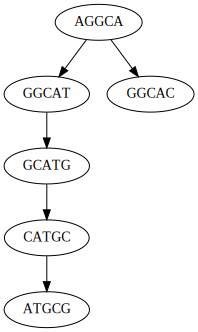

In [18]:
# test/run overlap function

pat = ['ATGCG',
       'GCATG',
       'CATGC',
       'AGGCA',
       'GGCAT',
       'GGCAC']
overlap(pat, prnt=True, genGraph=True, ret=False)

# with open("./Data/dataset_198_10.txt") as inFile:
#     data = inFile.readlines()
    
# pat = []
# for line in data:
#     pat.append(line.strip())

# overlap(pat, genGraph=True, ret=False)
    
# test = overlap(pat)
# with open("./Data/dataset_198_10_RES.txt", 'w') as outFile:
#     for key in test:
#         for edg in test[key]:
#             outFile.write(key + " -> " + edg + "\n")

Now that we can generate the graph, how can we find the path that visits each node once (**Hamiltonian Path**)



In [27]:
def DBFromString(Text, k, prnt=False, ret=True, output=None):
    '''
    De Bruijn Graph from a String
    Generate the adjacency list of the De Bruijn graph for a given text.
    
    Args:
        Text (string): Text to generate De Bruijn graph from.
        k (int): Length of k-mer to use in building De Bruijn graph.
        prnt (bool, optional): Defualts to False. Prints formatted adjacency list if True.
        ret (bool, optional): Defaults to True. Returns adjacency list.
        output (string, optional): Defualts to None. If not None, resulting adjacency list is written to the given filename.
        
    Returns:
        dict[string] = list[string], optional: Mapping of nodes to edges of De Bruijn graph.
    '''
    path = dict()
    k -= 1
    for i in range(len(Text) - k):
        kmer = Text[i:i+k]
        if kmer not in path:
            path[kmer] = [Text[i+1:i+k+1]]
        else:
            path[kmer].append(Text[i+1:i+k+1])

    if prnt or output != None:
        if output != None:
            f = open(output, 'w')
        for key in path:
            res = path[key][0]
            if len(path[key]) > 1:
                    for i in range(1, len(path[key])):
                        res += f", {path[key][i]}"
            if prnt:
                    print(f"{key} -> {res}")
            if output != None:
                f.write(f"{key} -> {res}\n")
        if output != None:
            f.close()
    if ret:
        return path

In [28]:
# test/run DBFromString function

DBFromString('AAGATTCTCTAAGA', 4, prnt=True, ret=False)

# with open("./Data/dataset_199_6.txt") as inFile:
#     data = inFile.readlines()
    

# DBFromString(data[1].strip(), int(data[0].strip()), prnt=True, ret=False, output="./Data/dataset_199_6_RES.txt")

AAG -> AGA, AGA
AGA -> GAT
GAT -> ATT
ATT -> TTC
TTC -> TCT
TCT -> CTC, CTA
CTC -> TCT
CTA -> TAA
TAA -> AAG


We can generate a potential reconstruction if we find a path through the de Bruijn graph that visits each edge exactly once (**Eulerian Path**)

So far we have generated the de Bruijn graph from a string now can you do that from a collection of k-mers

In [30]:
def DBFromKmers(Patterns, ret=True, prnt=False, output=None):
    '''
    De Bruijn Graph from collection of k-mers
    Generate the adjacency list of the De Bruijn graph for a collection of k-mers
    
    Args:
        Patterns (list[strings]): Collection of k-mers to construct the De Bruijn graph from.
        prnt (bool, optional): Defualts to False. Prints formatted adjacency list if True.
        ret (bool, optional): Defaults to True. Returns adjacency list.
        output (string, optional): Defualts to None. If not None, resulting adjacency list is written to the given filename.
        
    Returns:
        dict[string] = list[string], optional: Mapping of nodes to edges of De Bruijn graph.
    '''
    k = len(Patterns[0])
    kDict = dict()
    for kmer in Patterns:
        pre = kmer[:k-1]
        suf = kmer[len(kmer) - k + 1:]
        if pre not in kDict:
            kDict[pre] = [suf]
        else:
            kDict[pre].append(suf)
            
    keySort = sorted(list(kDict.keys()))
    if prnt or output != None:
        if output != None:
            f = open(output, 'w')
        for key in keySort:
            res = kDict[key][0]
            if len(kDict[key]) > 1:
                for i in range(1, len(kDict[key])):
                    res += f",{kDict[key][i]}"
            if prnt:
                print(f"{key} -> {res}")
            if output != None:
                f.write(f"{key} -> {res}\n")
        if output != None:
            f.close()
    if ret:
        return kDict

In [31]:
# test/run DBFromKmers function

pat = ['GAGG', 'CAGG', 'GGGG', 'GGGA', 'CAGG', 'AGGG', 'GGAG']
DBFromKmers(pat,ret=False, prnt=True)

# with open("./Data/dataset_200_8.txt") as inFile:
#     data = inFile.readlines()

# pat = [x.strip() for x in data]
# DBFromKmers(pat, ret=False, prnt=True, output="./Data/dataset_200_8_RES.txt")

AGG -> GGG
CAG -> AGG,AGG
GAG -> AGG
GGA -> GAG
GGG -> GGG,GGA


Now we have two ways of solving the String Reconstruction Problem:
1. Find the Hamiltonian path (visit all nodes once) in the overlap graph
2. Find the Eulerian path (visit all edges once) in the de Bruijn graph

Which is best? On a first glance the de Bruijn graph looks smaller and easier to work with however in a real assembly problem with millions of nodes all that matters is finding an efficient algorithm for reconstructing the genome. So whichever problem we can devise an efficient algorithm is the best.